### This case study aims to give us an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that we have learnt in the EDA module, we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

This case study aims to give an idea of applying EDA in a real business scenario. In this case study, we will develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import itertools

In [2]:
# It contains all the information of the client at the time of application. 
# The data is about whether a client has payment difficulties.
application_data = pd.read_csv('C:\\Anuj NIT\\Projects\\Default Risk Analysis\\Dataset\\application_data.csv')
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# It contains information about the client’s previous loan data. It contains the data whether the previous 
# application had been Approved, Cancelled, Refused or Unused offer.
previous_application = pd.read_csv('C:\\Anuj NIT\\Projects\\Default Risk Analysis\\Dataset\\previous_application.csv')
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#It is data dictionary which describes the meaning of the variables.
columns_description = pd.read_csv('C:\\Anuj NIT\\Projects\\Default Risk Analysis\\Dataset\\columns_description.csv',skiprows=1)
columns_description.head()

,1,application_data,SK_ID_CURR,ID of loan in our sample,Unnamed: 4
0,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
1,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
2,6,application_data,CODE_GENDER,Gender of the client,NaN
3,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
4,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN


In [8]:
columns_description.head(50)

,1,application_data,SK_ID_CURR,ID of loan in our sample,Unnamed: 4
0,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
1,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
2,6,application_data,CODE_GENDER,Gender of the client,NaN
3,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
4,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
5,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
6,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
7,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
8,12,application_data,AMT_ANNUITY,Loan annuity,NaN
9,13,application_data,AMT_GOODS_PRICE,For consumer loans it is the price of the good...,NaN


In [5]:
# Dataset Shape
print('application_data:',application_data.shape)
print('previous_application:',previous_application.shape)
print('columns_description:',columns_description.shape)

application_data: (307511, 122)
previous_application: (1670214, 37)
columns_description: (159, 5)


# Null Value Calculation in Previous Application

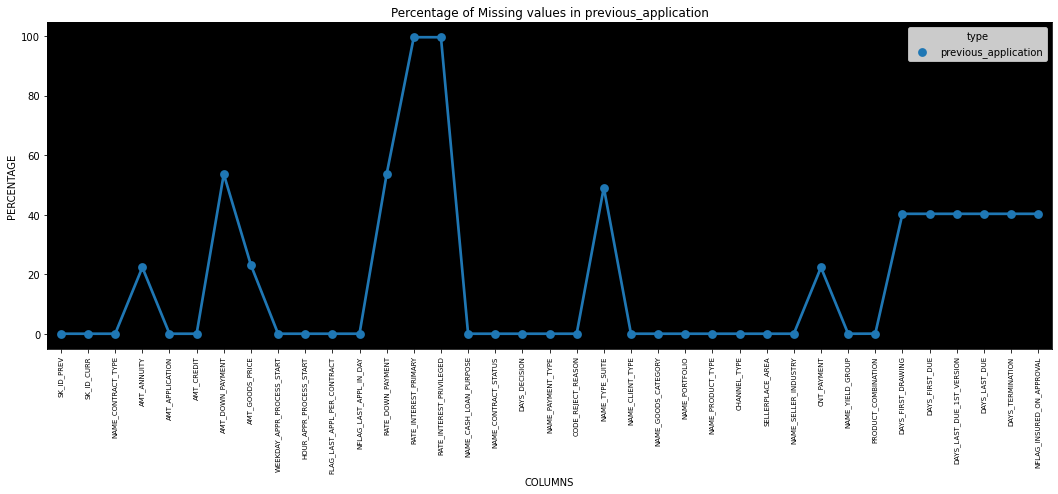

In [6]:
# checking the percentage of missing values
plt.figure(figsize=(18,6))
miss_previous_application = pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
miss_previous_application["type"] = "previous_application"
ax = sns.pointplot("index",0,data=miss_previous_application,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in previous_application")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
#fig.set_facecolor("lightgrey")

In [7]:
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [ ]:
# Removing columns which contain NA's more than 50%
# As per Industrial Standard, max Threshold limit can be between 40% to 50 % depending upon 
# the data acquired in specific sector.

In [8]:
# Here we can see that some attributes have NA's more than 50% so we need to drop them 
previous_application = previous_application.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'],axis=1)
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
previous_application.shape

(1670214, 33)

# Missing Value Imputation in Previous Application

In [10]:
previous_application.AMT_ANNUITY.median()

11250.0

In [11]:
# We impute NA's with median in Amount Annuity ( AMT_ANNUITY)
previous_application['AMT_ANNUITY'] = previous_application['AMT_ANNUITY'].fillna(value=11250)

In [12]:
previous_application.AMT_GOODS_PRICE.median()

112320.0

In [13]:
# We impute NA's with median in Amount Good Price ( AMT_GOOD_PRICE )
previous_application['AMT_GOODS_PRICE'] = previous_application['AMT_GOODS_PRICE'].fillna(value=112320)

In [14]:
previous_application['CNT_PAYMENT'].median()

12.0

In [15]:
previous_application['CNT_PAYMENT'] = previous_application['CNT_PAYMENT'].fillna(value=12)

In [16]:
previous_application.DAYS_FIRST_DRAWING.median()

365243.0

In [17]:
previous_application['DAYS_FIRST_DRAWING'] = previous_application['DAYS_FIRST_DRAWING'].fillna(value=365243)

In [18]:
previous_application['DAYS_FIRST_DUE'].median()

-831.0

In [19]:
previous_application['DAYS_FIRST_DUE'] = previous_application['DAYS_FIRST_DUE'].fillna(value=-831.0)

In [20]:
previous_application['DAYS_LAST_DUE_1ST_VERSION'].median()

-361.0

In [21]:
previous_application['DAYS_LAST_DUE_1ST_VERSION']=previous_application['DAYS_LAST_DUE_1ST_VERSION'].fillna(value=-361.0)

In [22]:
previous_application['DAYS_LAST_DUE'].median()

-537.0

In [23]:
previous_application['DAYS_LAST_DUE'] = previous_application['DAYS_LAST_DUE'].fillna(value=-537.0)

In [24]:
previous_application['DAYS_TERMINATION'].median()

-499.0

<AxesSubplot:xlabel='DAYS_TERMINATION', ylabel='Density'>

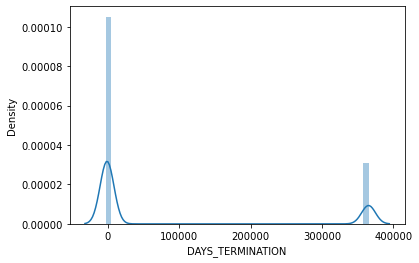

In [25]:
sns.distplot(previous_application['DAYS_TERMINATION'])

In [26]:
previous_application['DAYS_TERMINATION'] = previous_application['DAYS_TERMINATION'].fillna(value=-499.0)

In [27]:
previous_application['NFLAG_INSURED_ON_APPROVAL'].median()

0.0

<AxesSubplot:xlabel='NFLAG_INSURED_ON_APPROVAL', ylabel='Density'>

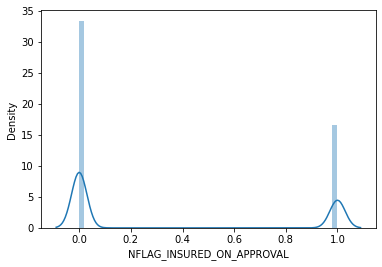

In [28]:
sns.distplot(previous_application['NFLAG_INSURED_ON_APPROVAL'])

In [29]:
previous_application['NFLAG_INSURED_ON_APPROVAL']=previous_application['NFLAG_INSURED_ON_APPROVAL'].fillna(value=0.0)

In [30]:
previous_application['AMT_CREDIT']

0           17145.0
1          679671.0
2          136444.5
3          470790.0
4          404055.0
             ...   
1670209    311400.0
1670210     64291.5
1670211    102523.5
1670212    191880.0
1670213    360000.0
Name: AMT_CREDIT, Length: 1670214, dtype: float64

In [31]:
previous_application['AMT_CREDIT'].median()

80541.0

In [32]:
previous_application['AMT_CREDIT']=previous_application['AMT_CREDIT'].fillna(value=80541.0)

In [33]:
previous_application.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                         0
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_GOODS_PRICE                     0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                         0
NAME_YIELD_GROUP                    0
PRODUCT_COMB

In [34]:
previous_application['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [35]:
previous_application['PRODUCT_COMBINATION'].mode()

0    Cash
Name: PRODUCT_COMBINATION, dtype: object

In [36]:
previous_application['PRODUCT_COMBINATION'] =  previous_application['PRODUCT_COMBINATION'].fillna(value=previous_application['PRODUCT_COMBINATION'].mode()[0])

In [37]:
previous_application['PRODUCT_COMBINATION'].isnull().sum()

0

In [38]:
previous_application['NAME_TYPE_SUITE'].head(20)

0                 NaN
1       Unaccompanied
2     Spouse, partner
3                 NaN
4                 NaN
5              Family
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10      Unaccompanied
11      Unaccompanied
12      Unaccompanied
13      Unaccompanied
14                NaN
15      Unaccompanied
16      Unaccompanied
17      Unaccompanied
18      Unaccompanied
19                NaN
Name: NAME_TYPE_SUITE, dtype: object

In [39]:
previous_application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

In [40]:
previous_application['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [41]:
previous_application['NAME_TYPE_SUITE']=previous_application['NAME_TYPE_SUITE'].fillna(value=previous_application['NAME_TYPE_SUITE'].mode()[0])

In [42]:
previous_application.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_

In [43]:
#converting categorical and numerical values in different dtypes
obj_dtypes = [i for i in previous_application.select_dtypes(include=np.object).columns if i not in ["type"] ]
num_dtypes = [i for i in previous_application.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]

In [44]:
obj_dtypes

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [45]:
num_dtypes

['SK_ID_PREV',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

# Finding and Imputing missing values in Application Data

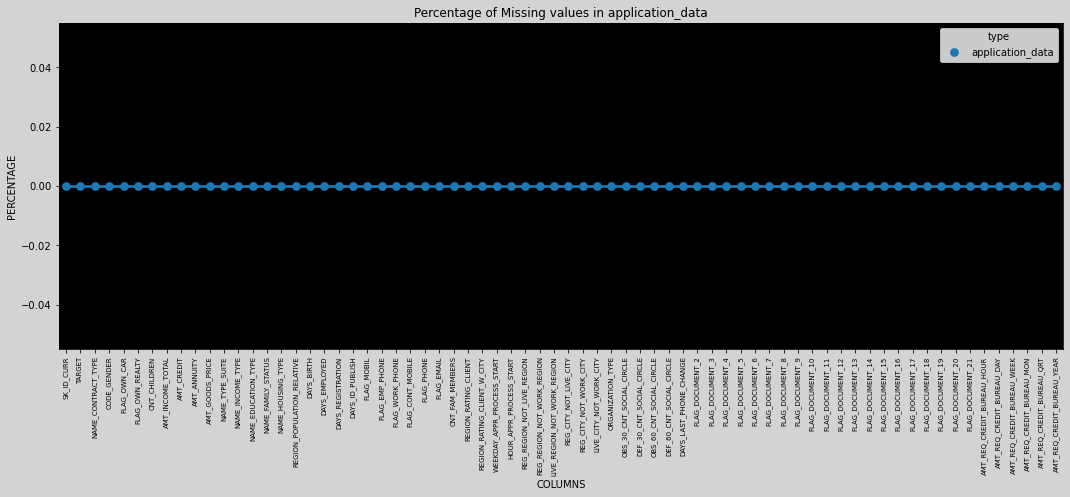

In [177]:
# percentage of missing values in application data
fig = plt.figure(figsize=(18,6))
miss_application_data = pd.DataFrame((application_data.isnull().sum())*100/application_data.shape[0]).reset_index()
miss_application_data["type"] = "application_data"
ax = sns.pointplot("index",0,data=miss_application_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application_data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [46]:
application_data.shape

(307511, 122)

In [47]:
round(100*(application_data.isnull().sum()/len(application_data.index)),2).head(60)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
F

In [49]:
round(100*(application_data.isnull().sum()/len(application_data.index)),2).tail(60)

COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTMENTS_MODE           68.35
LIVINGAREA_MODE                 50.19
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAREA_MODE              55.18
APARTMENTS_MEDI                 50.75
BASEMENTAREA_MEDI               58.52
YEARS_BEGINEXPLUATATION_MEDI    48.78
YEARS_BUILD_MEDI                66.50
COMMONAREA_MEDI                 69.87
ELEVATORS_MEDI                  53.30
ENTRANCES_MEDI                  50.35
FLOORSMAX_MEDI                  49.76
FLOORSMIN_MEDI                  67.85
LANDAREA_MEDI                   59.38
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAREA_MEDI                 50.19
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAREA_MEDI              55.18
FONDKAPREMONT_MODE              68.39
HOUSETYPE_MODE                  50.18
TOTALAREA_MO

In [48]:
previous_application.shape , application_data.shape

((1670214, 33), (307511, 122))

In [57]:
# we need to drop those columns which contains null values more that 40%

In [59]:
application_data = application_data.drop(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1)

In [60]:
application_data.shape

(307511, 70)

In [61]:
round(100*(application_data.isnull().sum()/len(application_data.index)),2).head(60)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS             

In [101]:
round(100*(application_data.isnull().sum()/len(application_data.index)),2).head(15)

SK_ID_CURR             0.0
TARGET                 0.0
NAME_CONTRACT_TYPE     0.0
CODE_GENDER            0.0
FLAG_OWN_CAR           0.0
FLAG_OWN_REALTY        0.0
CNT_CHILDREN           0.0
AMT_INCOME_TOTAL       0.0
AMT_CREDIT             0.0
AMT_ANNUITY            0.0
AMT_GOODS_PRICE        0.0
NAME_TYPE_SUITE        0.0
NAME_INCOME_TYPE       0.0
NAME_EDUCATION_TYPE    0.0
NAME_FAMILY_STATUS     0.0
dtype: float64

In [64]:
# imputing missing values 
application_data['AMT_GOODS_PRICE'].isnull().sum()

278

In [67]:
application_data['AMT_GOODS_PRICE']= application_data['AMT_GOODS_PRICE'].fillna(value=application_data['AMT_GOODS_PRICE'].median())

In [68]:
application_data['AMT_GOODS_PRICE'].isnull().sum()

0

In [70]:
application_data['NAME_TYPE_SUITE'].isnull().sum()

1292

In [72]:
application_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [73]:
application_data['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [76]:
application_data['NAME_TYPE_SUITE']=application_data['NAME_TYPE_SUITE'].fillna(value=application_data['NAME_TYPE_SUITE'].mode()[0])

In [78]:
application_data['NAME_TYPE_SUITE'].isnull().sum()

0

In [82]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].median()

0.0

In [84]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'] = application_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(application_data['OBS_30_CNT_SOCIAL_CIRCLE'].median())

In [85]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [89]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].median()

0.0

In [90]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [91]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(value=application_data['DEF_30_CNT_SOCIAL_CIRCLE'].median(),inplace=True)

In [92]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [94]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].median()

0.0

In [95]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(application_data['OBS_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)

In [96]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [98]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].median()

0.0

In [99]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(value=application_data['DEF_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)

In [100]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [108]:
round(100*(application_data.isnull().sum()/len(application_data.index)),2).tail(10)

FLAG_DOCUMENT_18               0.0
FLAG_DOCUMENT_19               0.0
FLAG_DOCUMENT_20               0.0
FLAG_DOCUMENT_21               0.0
AMT_REQ_CREDIT_BUREAU_HOUR    13.5
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
dtype: float64

In [110]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].median()

0.0

In [112]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(value=application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].median(),inplace=True)

In [113]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

0

In [115]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].median()

0.0

In [116]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(value=application_data['AMT_REQ_CREDIT_BUREAU_DAY'].median(),inplace=True)

In [118]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

0

In [119]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

41519

In [120]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(value=application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].median(),inplace=True)

In [121]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

0

In [122]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].median()

0.0

In [124]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(value=application_data['AMT_REQ_CREDIT_BUREAU_MON'].median(),inplace=True)

In [125]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

0

In [127]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].median()

0.0

In [129]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(value=application_data['AMT_REQ_CREDIT_BUREAU_QRT'].median(),inplace=True)

In [131]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

0

In [132]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].median()

1.0

In [137]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(value=application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].median(),inplace=True)

In [138]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

0

In [143]:
application_data['AMT_ANNUITY'].isnull().sum()

12

In [146]:
application_data['AMT_ANNUITY'].median()

24903.0

In [147]:
application_data['AMT_ANNUITY'].fillna(value=application_data['AMT_ANNUITY'].median(),inplace=True)

In [148]:
application_data['AMT_ANNUITY'].isnull().sum()

0

In [152]:
application_data['CNT_FAM_MEMBERS'].median()

2.0

In [153]:
application_data['CNT_FAM_MEMBERS'].fillna(value=application_data['CNT_FAM_MEMBERS'].median(),inplace=True)

In [154]:
application_data['CNT_FAM_MEMBERS'].isnull().sum()

0

In [158]:
application_data['DAYS_LAST_PHONE_CHANGE'].median()

-757.0

In [160]:
application_data['DAYS_LAST_PHONE_CHANGE'].fillna(value=application_data['DAYS_LAST_PHONE_CHANGE'].median(),inplace=True)

In [161]:
application_data['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

In [162]:
application_data.isnull().sum().sum() 

0

In [163]:
# we have some negative values in dataset we need to convert them to positive 

In [165]:
application_data['DAYS_BIRTH'] = abs(application_data['DAYS_BIRTH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_LAST_PHONE_CHANGE'] = abs(application_data['DAYS_LAST_PHONE_CHANGE'])
application_data['DAYS_EMPLOYED'] = abs(application_data['DAYS_EMPLOYED'])

In [167]:
previous_application['DAYS_FIRST_DUE'] = abs(previous_application['DAYS_FIRST_DUE'])
previous_application['DAYS_LAST_DUE_1ST_VERSION'] = abs(previous_application['DAYS_LAST_DUE_1ST_VERSION'])
previous_application['DAYS_LAST_DUE'] = abs(previous_application['DAYS_LAST_DUE'])
previous_application['DAYS_TERMINATION'] = abs(previous_application['DAYS_TERMINATION'])

In [178]:
previous_application.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,365243.0,831.0,361.0,537.0,499.0,0.0
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,654.0,144.0,144.0,137.0,1.0
6,2315218,175704,Cash loans,11250.000,0.0,0.0,112320.0,TUESDAY,11,Y,...,XNA,12.0,XNA,Cash,365243.0,831.0,361.0,537.0,499.0,0.0
7,1656711,296299,Cash loans,11250.000,0.0,0.0,112320.0,MONDAY,7,Y,...,XNA,12.0,XNA,Cash,365243.0,831.0,361.0,537.0,499.0,0.0
8,2367563,342292,Cash loans,11250.000,0.0,0.0,112320.0,MONDAY,15,Y,...,XNA,12.0,XNA,Cash,365243.0,831.0,361.0,537.0,499.0,0.0
9,2579447,334349,Cash loans,11250.000,0.0,0.0,112320.0,SATURDAY,15,Y,...,XNA,12.0,XNA,Cash,365243.0,831.0,361.0,537.0,499.0,0.0


In [169]:
application_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [170]:
obj_dtypes1 = [i for i in application_data.select_dtypes(include=np.object).columns if i not in ["type"] ]
num_dtypes1= [i for i in application_data.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]

In [171]:
obj_dtypes1

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [172]:
num_dtypes1

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCU

In [ ]:
plt.figure(figsize=(12,8))


<AxesSubplot:ylabel='CODE_GENDER'>

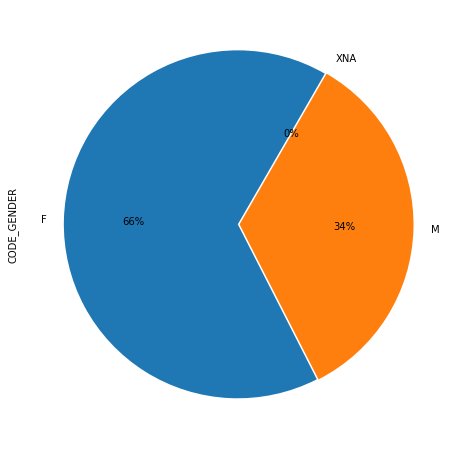

In [20]:
# Imbalance percentage
plt.figure(figsize=(12,8))
application_data['CODE_GENDER'].value_counts().plot.pie(autopct='%.0f%%',startangle=60 ,explode=[0.01,0,0])
# Data is not balanced 

In [175]:
application_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

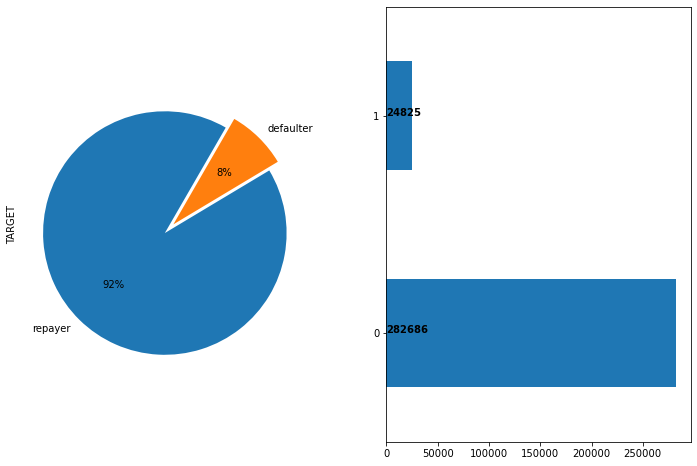

In [176]:
# Distribution of target variable
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
application_data['TARGET'].value_counts().plot.pie(autopct='%.0f%%',startangle=60 ,explode=[0.1,0],labels = ['repayer','defaulter'])

plt.subplot(1,2,2)
ax = application_data["TARGET"].value_counts().plot(kind="barh")
for i,j in enumerate(application_data['TARGET'].value_counts().values):
    ax.text(.1,i,j,weight='bold')

# TARGET : 1 - client with payment difficulties: he/she had late payment more than  X days on at least one of the first Y installments of the loan in sample
#          0 - all other cases
# 8% out of total client population have difficulties in repaying loans.

Text(0.5, 1.0, 'distribution of contract types in previous_df')

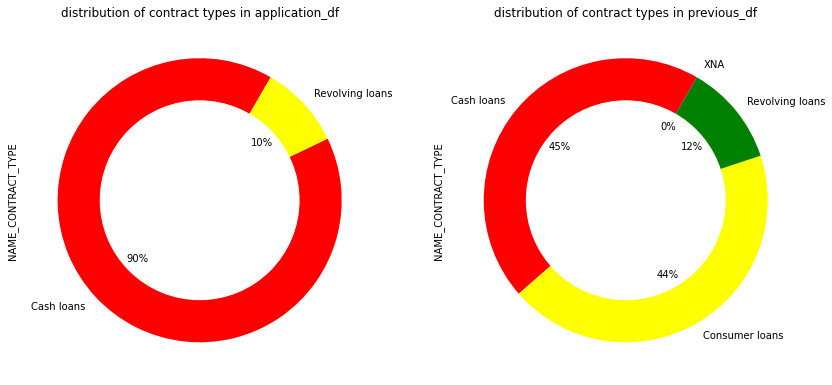

In [180]:
# Distribution of contract type in application data and previous data
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
application_data['NAME_CONTRACT_TYPE'].value_counts().plot.pie(autopct='%.0f%%', colors =['red','yellow','green','blue'],
                                                             startangle=60)
circ = plt.Circle((0,0),.7,color='white')  # .7 for size of inner circle and color='white' for color of inner circle
plt.gca().add_artist(circ)
plt.title("distribution of contract types in application_df")

plt.subplot(1,2,2)
previous_application['NAME_CONTRACT_TYPE'].value_counts().plot.pie(autopct='%.0f%%', colors =['red','yellow','green','blue'],
                                                             startangle=60)
circ = plt.Circle((0,0),.7,color='white')  # .7 for size of inner circle and color='white' for color of inner circle
plt.gca().add_artist(circ)
plt.title("distribution of contract types in previous_df")

<AxesSubplot:ylabel='CODE_GENDER'>

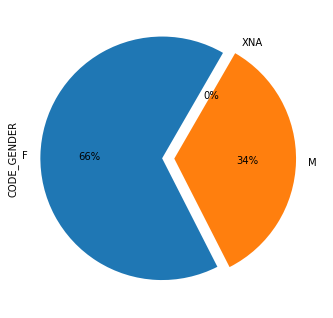

In [181]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
application_data['CODE_GENDER'].value_counts().plot.pie(autopct='%.0f%%',startangle=60 ,explode=[0.1,0,0])

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

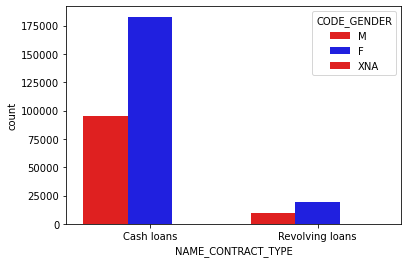

In [182]:
# Distribution of contract type by gender
sns.countplot('NAME_CONTRACT_TYPE', hue='CODE_GENDER', data=application_data, palette=['red','blue'])

In [183]:
# Distribution of client owning a car by gender

Text(0.5, 1.0, 'distribution of client not own car by gender')

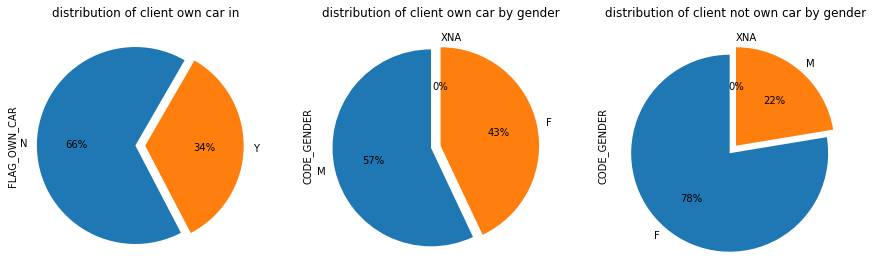

In [184]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
application_data['FLAG_OWN_CAR'].value_counts().plot.pie(autopct='%.0f%%',startangle=60 ,explode=[0.1,0])
plt.title('distribution of client own car in')

plt.subplot(1,3,2)
application_data[application_data['FLAG_OWN_CAR'] == 'Y']['CODE_GENDER'].value_counts().plot.pie(autopct='%.0f%%',
                                                                                             startangle=90,explode=[0.1,0,0])
plt.title('distribution of client own car by gender')

plt.subplot(1,3,3)
application_data[application_data['FLAG_OWN_CAR'] == 'N']['CODE_GENDER'].value_counts().plot.pie(autopct='%.0f%%',
                                                                                             startangle=90,explode=[0.1,0,0])
plt.title('distribution of client not own car by gender')

In [ ]:
# SUBPLOT 1 : Distribution of client owning a car. 34% of clients own a car
# SUBPLOT 2 : Distribution of client owning a car by gender. Out of total clients who own car 57% are male and 43% are female.
# SUBPLOT 3 : Distribution of client not owning a car by gender. Out of total clients who not own car 22% are male and 78% are female.

<AxesSubplot:ylabel='CODE_GENDER'>

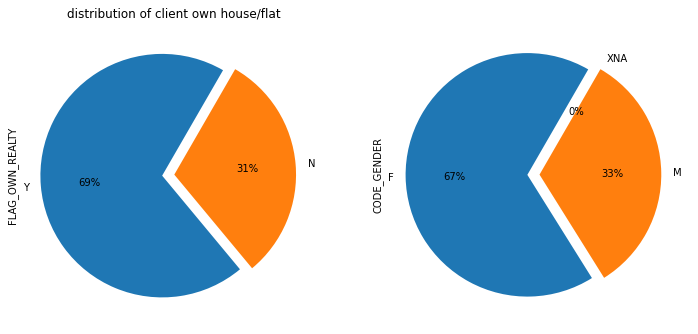

In [185]:
# Distribution of client owning a house or flat and by gender
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
application_data['FLAG_OWN_REALTY'].value_counts().plot.pie(autopct='%.0f%%', startangle=60, explode=[0.1,0])
plt.title('distribution of client own house/flat')

plt.subplot(1,2,2)
application_data[application_data['FLAG_OWN_REALTY']=='Y']['CODE_GENDER'].value_counts().plot.pie(autopct='%.0f%%',
                                                                                              startangle=60, explode=[0.1,0,0])

In [ ]:
# SUBPLOT 1 : Distribution of client owning a house or flat . 69% of clients own a flat or house .
# SUBPLOT 2 : Distribution of client owning a house or flat by gender . Out of total clients who own house 67% are 
# female and 33% are male.

Text(0.5, 1.0, 'Number of family members client has  by repayment status')

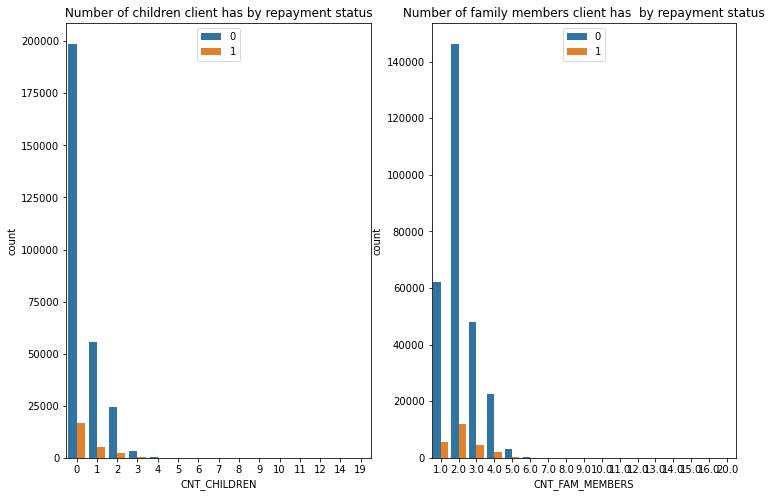

In [186]:
# Distribution of Number of children and family members of client by repayment status
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.countplot(application_data['CNT_CHILDREN'], hue=application_data['TARGET'])
plt.legend(loc="upper center")
plt.title("Number of children client has by repayment status")

plt.subplot(1,2,2)
sns.countplot(application_data['CNT_FAM_MEMBERS'], hue=application_data['TARGET'])
plt.legend(loc="upper center")
plt.title("Number of family members client has  by repayment status")

In [ ]:
# Distribution of contract type ,gender ,own car ,own house with respect to Repayment status(Target variable)

In [187]:
import itertools

default = application_data[application_data['TARGET']==1][['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR',
                                                       'FLAG_OWN_REALTY']]
non_default = application_data[application_data['TARGET']==0][['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR',
                                                           'FLAG_OWN_REALTY']]
d_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
d_length = len(d_cols)

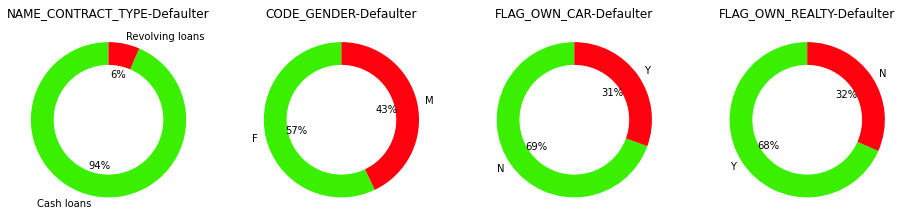

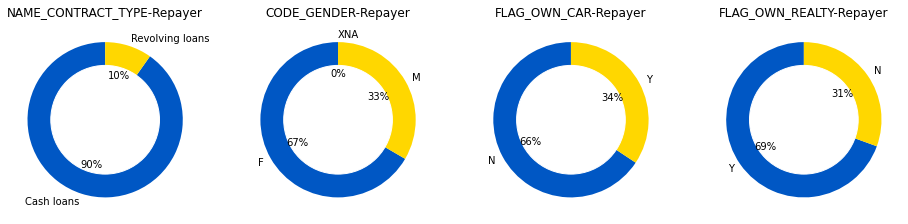

In [188]:
fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism"),startangle = 90)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Defaulter")

fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    non_default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",3),startangle = 90)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Repayer")

In [ ]:
# Percentage of males is 10% more in defaults than non defaulters.
# Percentage of Cash Loans is 4% more in defaults than Revolving Loans

In [190]:
application_data['AMT_INCOME_TOTAL'].max()

117000000.0

In [191]:
application_data['AMT_INCOME_TOTAL'] = application_data['AMT_INCOME_TOTAL'] / 100000  # as values are in lakh so we divide by 1lakh

In [193]:
application_data['AMT_INCOME_TOTAL'].min() # as we have  min 0 and max 1170 

0.2565

In [194]:
bins = [0,1,2,3,4,5,6,7,8,9,10,11]  # as we have max value greater than 1 m so thats why we took 11
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k',
        '600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']
application_data['AMT_INCOME_RANGE'] = pd.cut(application_data['AMT_INCOME_TOTAL'],bins, labels=slot)

In [196]:
application_data['AMT_INCOME_RANGE'].value_counts(normalize=True) *100

100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: AMT_INCOME_RANGE, dtype: float64

In [ ]:
# More than 50% loan applicants have income amount in the range of 100K-200K. Almost 92% loan applicants 
# have income less than 300K

In [198]:
application_data['AMT_CREDIT'].max()

4050000.0

In [200]:
application_data['AMT_CREDIT'] = application_data['AMT_CREDIT']/100000

In [201]:
application_data['AMT_CREDIT'].max()

40.5

In [202]:
bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']
application_data['AMT_CREDIT_RANGE'] = pd.cut(application_data['AMT_CREDIT'],bins, labels=slots)
application_data['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

In [203]:
application_data['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100
# More Than 16% loan applicants have taken loan which amounts to more than 1M.

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

In [205]:
application_data = application_data.drop(['AMT_CREDIT_RANGE'],axis=1)


In [206]:
application_data.shape

(307511, 71)

In [207]:
application_data['DAYS_EMPLOYED'].max()  # if we convert these into years then it is 1000 years which is impossible so delete it 

365243

In [208]:
application_data = application_data.drop(['DAYS_EMPLOYED'],axis=1)

In [209]:
application_data.shape

(307511, 70)

In [210]:
application_data.isnull().sum().sum()

232

In [211]:
mapping = {0:'Repayer', 1:'Defaulter'}
application_data['TARGET'] = application_data['TARGET'].map(mapping)

<AxesSubplot:xlabel='TARGET', ylabel='count'>

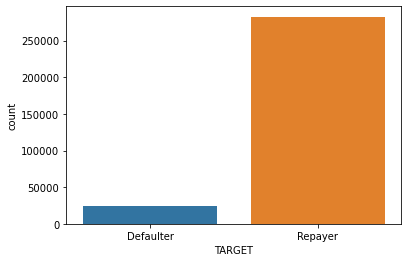

In [212]:
sns.countplot(data=application_data, x='TARGET')
# as we can see this is imbalance data

In [214]:
# function for plotting repetitive countplots
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t TARGET; 
# 2. Percentage of defaulters within column
# this graph is for univariate anlysis 

def plot_graph(feature,ylog=False,label_rotation=False):
    
    fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,4))   # for subplots
    
    s = sns.countplot(ax=ax1, x=feature, data=application_data, hue='TARGET', palette=['r','g']) # for graph 1
    
    if ylog:
         ax1.set_yscale('log')  # as y scale contains lot of values so we created log to show minimal value also in graph
    ax1.set_title(feature)
    ax1.set_xticklabels(s.get_xticklabels(),rotation=90)
    ax1.legend(['Defaulter','Repayer'])
    
    # for subplot 2 
    s = round(application_data[application_data['TARGET']== 'Defaulter'][feature].value_counts() /
      application_data[application_data['TARGET']== 'Repayer']  # this is for finding defaulter percentage in unique of graph 1 
      [feature].value_counts()*100,2
      ).reset_index().sort_values(by=feature,  # as from above code we creted a list that why we reset the index and sorted the 
                                  # value from max to min in subplot 2
                                   ascending=False).plot(ax=ax2 ,x='index', y=feature,kind='bar', # index shows o index in list
                                                         color = ['pink', 'orange', 'blue', 'yellow', 'purple','green'])

    if label_rotation:
        plt.show()
    ax2.set_title(feature +' defaulter%')
    ax2.set_xlabel(feature)
    ax2.get_legend().remove()
    ax2.set_ylabel('% Default')

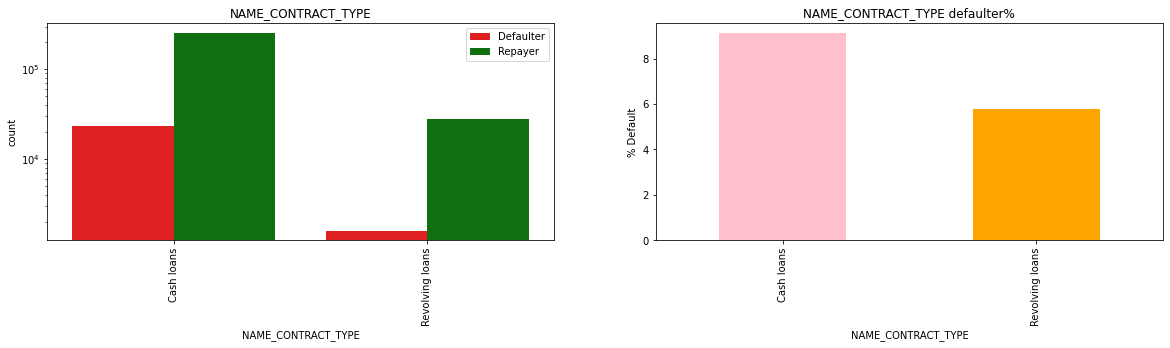

In [215]:
plot_graph('NAME_CONTRACT_TYPE',True)

In [ ]:
# Contract type: Revolving loans are just a small fraction (10%) from the total number of loans;
# in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

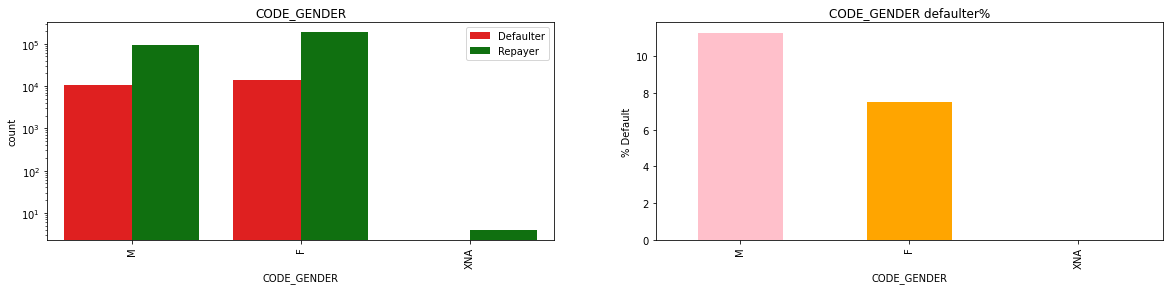

In [216]:
plot_graph('CODE_GENDER',True)

In [ ]:
# The number of female clients is almost double the number of male clients.
# Based on the percentage of defaulted credits, males have a higher chance of not returning their loans

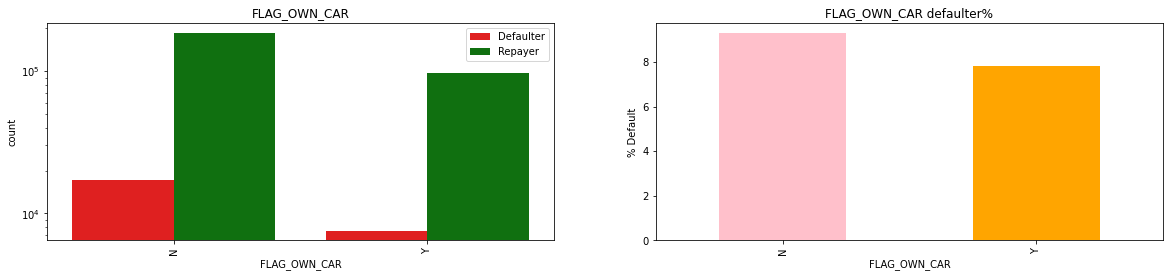

In [217]:
plot_graph('FLAG_OWN_CAR',True)

In [ ]:
# Clients who own a car are half in number of the clients who dont own a car. But based on the percentage of deault,
# there is no correlation between owning a car and loan repayment as in both cases the default percentage is almost same.

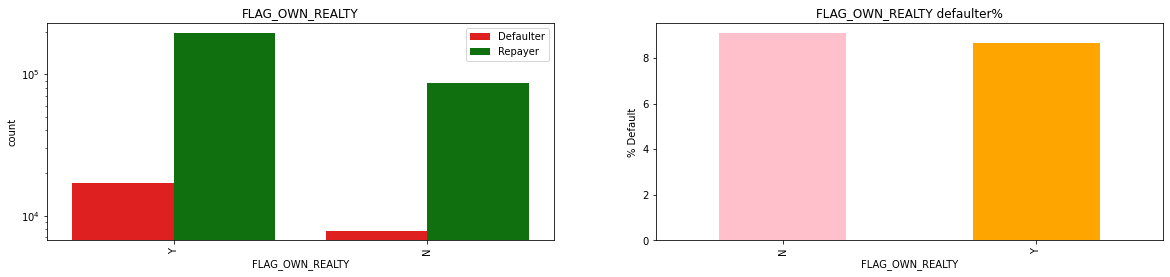

In [218]:
plot_graph('FLAG_OWN_REALTY',True)

In [219]:
# there is no correlation between owning a reality and defaulting the loan.

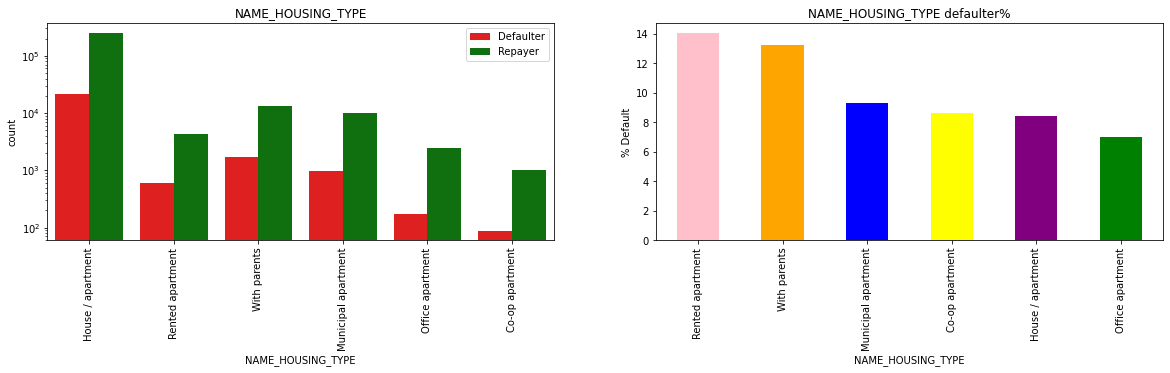

In [220]:
plot_graph('NAME_HOUSING_TYPE',True)

In [ ]:
# Majority of people live in House/apartment
# People living in office apartments have lowest default rate
# People living with parents (~11.5%) and living in rented apartments(>12%) have higher probability of defaulting


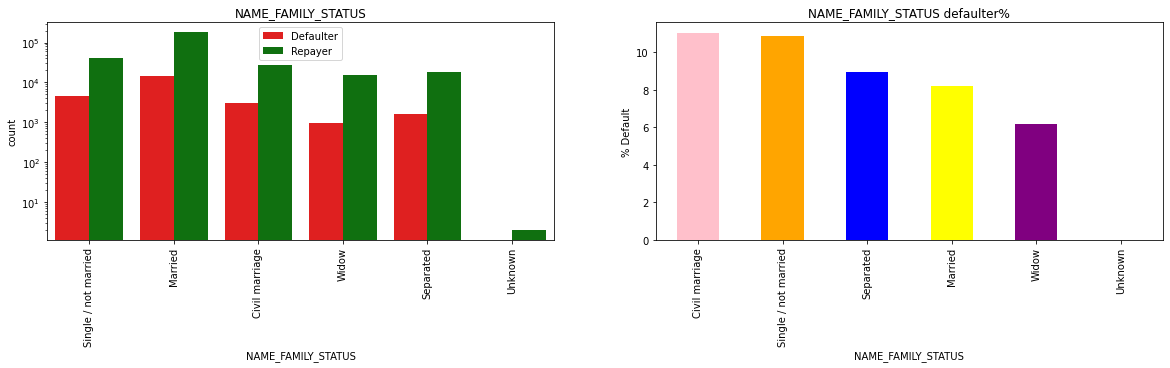

In [221]:
plot_graph('NAME_FAMILY_STATUS',True)

In [ ]:
# In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), 
# with Widow the lowest (exception being Unknown).

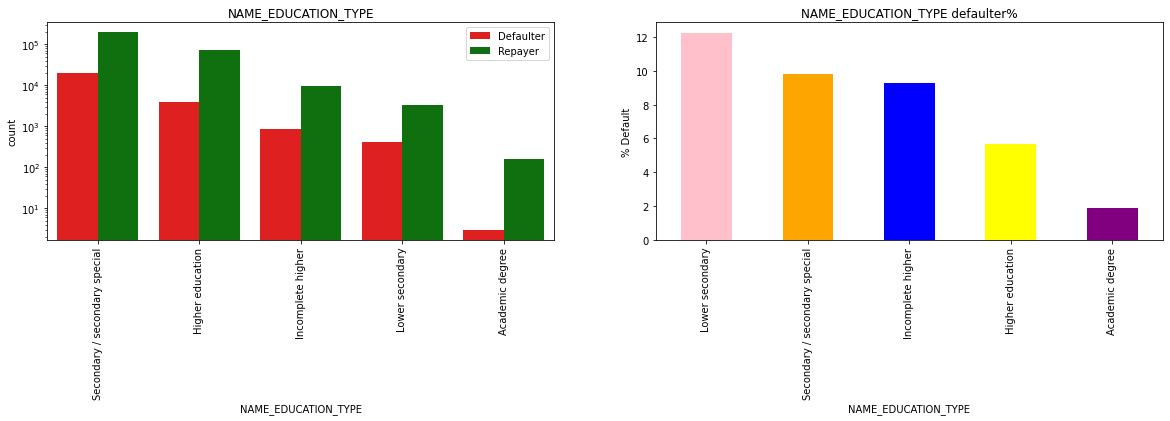

In [222]:
plot_graph('NAME_EDUCATION_TYPE',True)

In [223]:
# Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. 
# Only a very small number having an academic degree
# The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people
# with Academic degree have less than 2% defaulting rate.

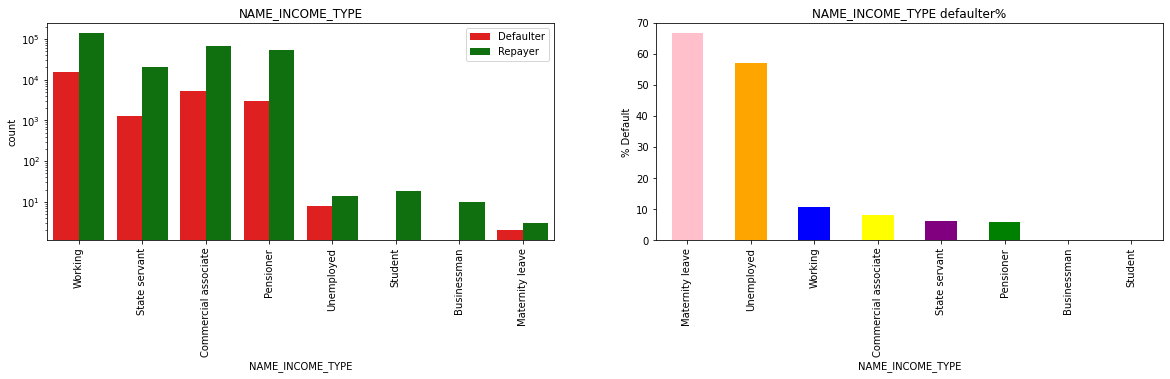

In [224]:
plot_graph('NAME_INCOME_TYPE',True)

In [ ]:
# Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.
# The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed 
# (37%). The rest of types of incomes are under the average of 10% for not returning loans.
# Student and Businessmen, though less in numbers do not have any default record. Thus these two category are safest for
# providing loan.

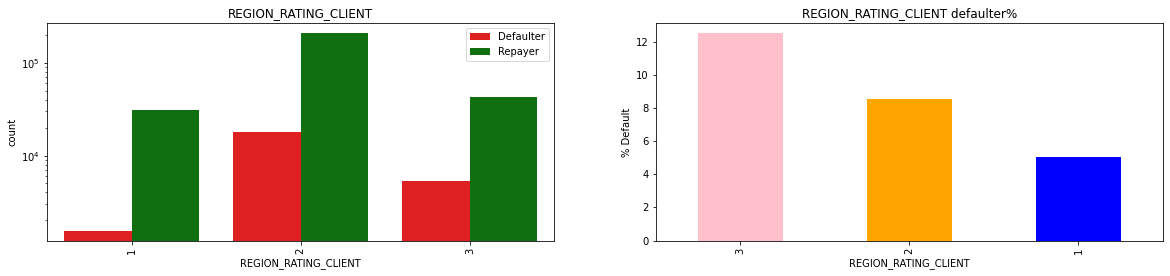

In [225]:
plot_graph('REGION_RATING_CLIENT',True)

In [226]:
# Most of the applicants are living in Region_Rating 2 place.
# Region Rating 3 has the highest default rate (11%)
# Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus safer for approving loans

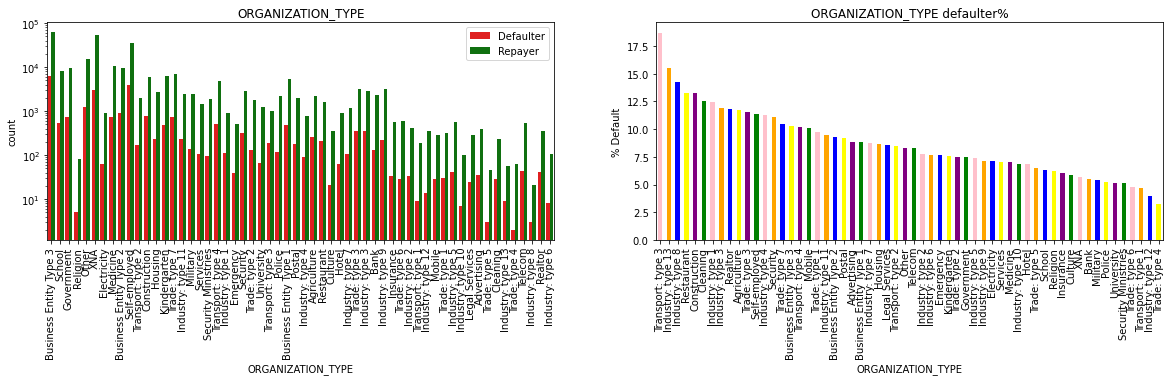

In [227]:
plot_graph('ORGANIZATION_TYPE',True)

In [ ]:
# Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
# Most of the people application for loan are from Business Entity Type 3
# For a very high number of applications, Organization type information is unavailable(XNA)
# It can be seen that following category of organization type has lesser defaulters thus safer for providing loans: Trade Type 4 and 5 Industry type 8

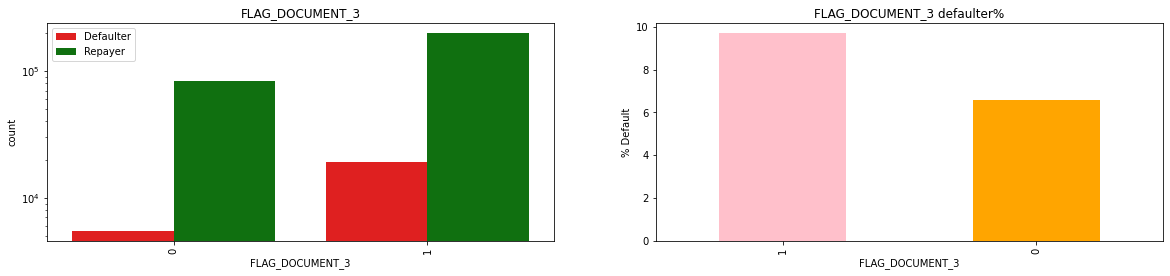

In [228]:
plot_graph('FLAG_DOCUMENT_3',True)

In [ ]:
# There is no significant correlation between repayers and defaulters in terms of submitting document 3 as we see even if applicants have submitted the document,
# they have defaulted a slightly more (~9%) than who have not submitted the document (6%)

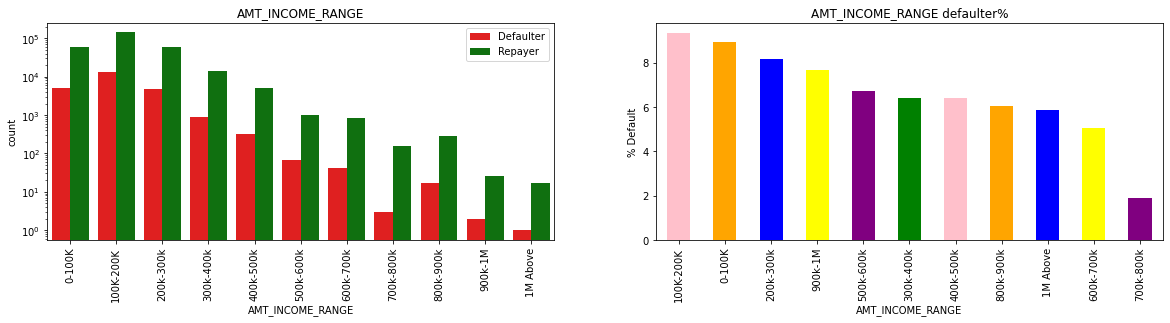

In [229]:
plot_graph('AMT_INCOME_RANGE',True)

In [230]:
# 90% of the applications have Income total less than 300,000
# Application with Income less than 300,000 has high probability of defaulting
# Applicant with Income more than 700,000 are less likely to default

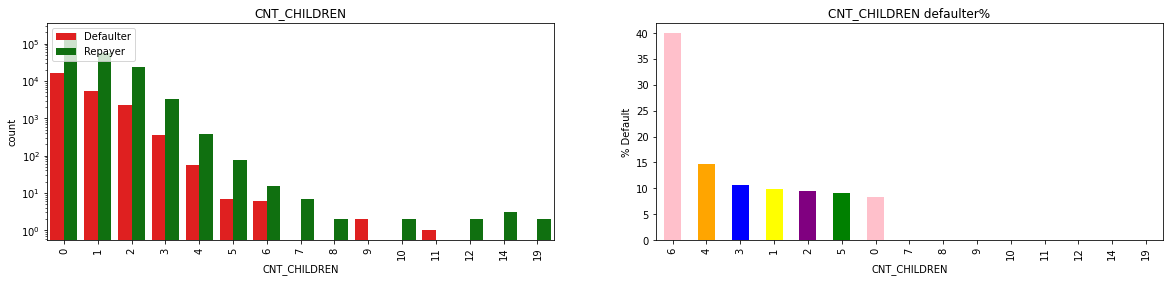

In [232]:
plot_graph('CNT_CHILDREN',True)

In [233]:
# Most of the applicants do not have children
# Very few clients have more than 3 children.
# Client who have more than 4 children has a very high default rate with child count 9 and 11 showing 100% default rate

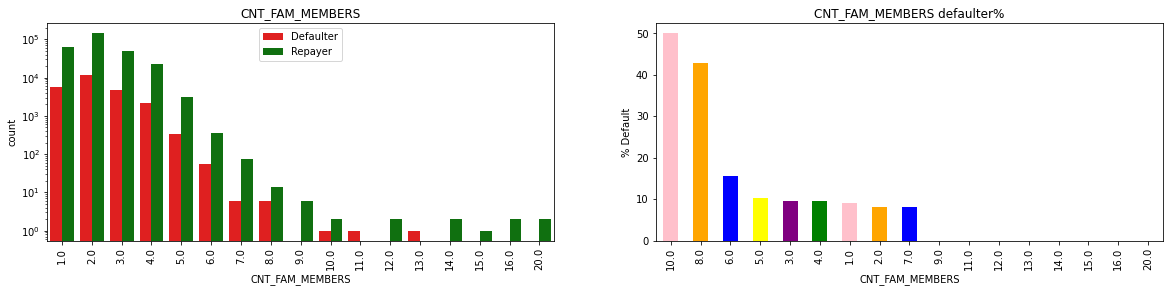

In [234]:
plot_graph('CNT_FAM_MEMBERS',True)

In [235]:
# Family member follows the same trend as children where having more family members increases the risk of defaulting

In [237]:
def bivariate_graph(x,y,data,hue):
    plt.figure(figsize=(9,5))
    sns.barplot(x=x, y=y, data=data, hue=hue, palette=['g','r']) # for graph 
    
    plt.xticks(rotation=90)
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

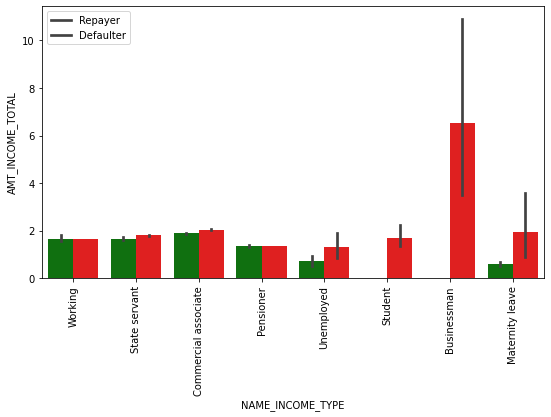

In [238]:
bivariate_graph('NAME_INCOME_TYPE','AMT_INCOME_TOTAL',application_data, 'TARGET')

In [ ]:
# It can be seen that business man's income is the highest and the estimated range with default 95% confidence 
# level seem to indicate that the income of a business man could be in the range of slightly close to 4 lakhs and slightly 
# above 10 lakhs

In [244]:
# to find relation between two attributes
def bivariate_rel(x,y,data, hue):
    
    plt.figure(figsize=(8,7))
    sns.relplot(x=x, 
                y=y, 
                data=application_data, 
                hue="TARGET",
                palette = ['g','r'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

<Figure size 576x504 with 0 Axes>

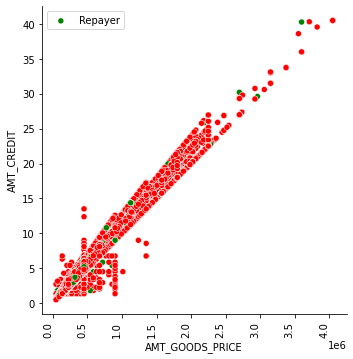

In [245]:
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',application_data,'TARGET')

In [246]:
# When the credit amount goes beyond 3M, there is an increase in defaulters.

In [247]:
loan_process_df = pd.merge(application_data, previous_application, how='inner', on='SK_ID_CURR')
loan_process_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,Defaulter,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,Repayer,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,Repayer,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
3,100003,Repayer,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0
4,100004,Repayer,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,784.0,694.0,724.0,714.0,0.0


In [248]:
loan_process_df['NAME_CASH_LOAN_PURPOSE']

0              XAP
1              XNA
2              XAP
3              XAP
4              XAP
            ...   
1413696        XNA
1413697        XAP
1413698    Repairs
1413699        XNA
1413700        XAP
Name: NAME_CASH_LOAN_PURPOSE, Length: 1413701, dtype: object

In [249]:
loan_process_df['NAME_CONTRACT_STATUS']

0          Approved
1          Approved
2          Approved
3          Approved
4          Approved
             ...   
1413696    Approved
1413697     Refused
1413698     Refused
1413699    Approved
1413700    Approved
Name: NAME_CONTRACT_STATUS, Length: 1413701, dtype: object

In [251]:
loan_process_df.shape

(1413701, 102)

In [252]:
loan_process_df.size

144197502

In [253]:
L0 = loan_process_df[loan_process_df['TARGET']=='Defaulter'] # Repayers
L1 = loan_process_df[loan_process_df['TARGET']=='Repayer'] # defaulters

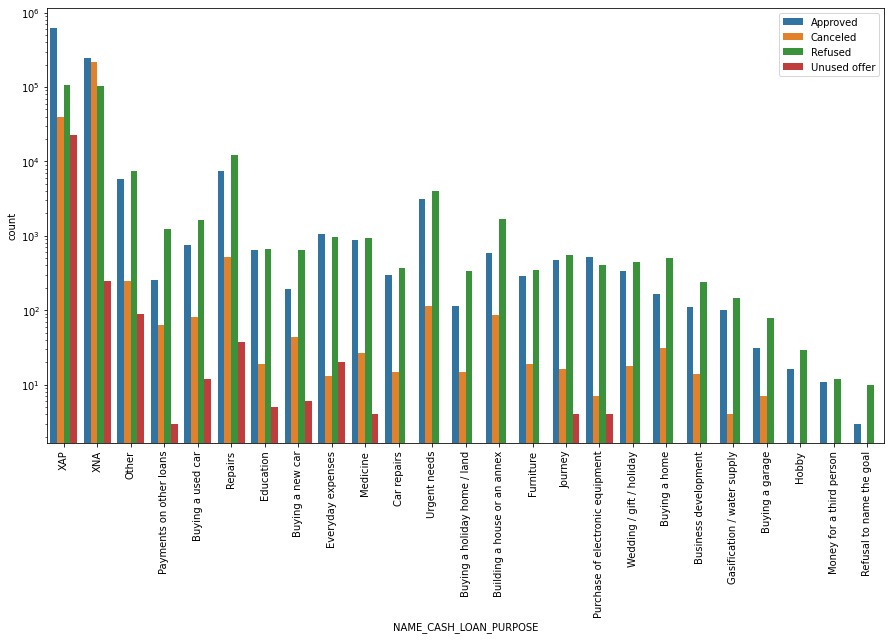

In [254]:
plt.figure(figsize=(15,8))
s1 = sns.countplot(x=loan_process_df['NAME_CASH_LOAN_PURPOSE'],data=L1,hue=loan_process_df['NAME_CONTRACT_STATUS'])
ylog=s1.set_yscale('log')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

In [255]:
# Loan purpose has high number of unknown values (XAP, XNA)
# Loan taken for the purpose of Repairs seems to have highest default rate
# A very high number application have been rejected by bank or refused by client which has purpose as repair or other. 
# This shows that purpose repair is taken as high risk by bank and either they are rejected or bank offers very high loan 
# interest rate which is not feasible by the clients, thus they refuse the loan.

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

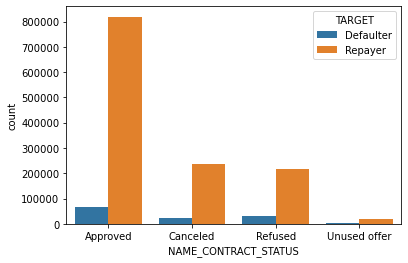

In [256]:
sns.countplot(x=loan_process_df['NAME_CONTRACT_STATUS'], data=loan_process_df, hue=loan_process_df['TARGET'])

In [257]:
x = loan_process_df.groupby('NAME_CONTRACT_STATUS')['TARGET']
df1 = pd.concat([x.value_counts(),round(x.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%"

In [258]:
df1

Counts Percentage
NAME_CONTRACT_STATUS TARGET                      
Approved             Repayer    818856     92.41%
                     Defaulter   67243      7.59%
Canceled             Repayer    235641     90.83%
                     Defaulter   23800      9.17%
Refused              Repayer    215952      88.0%
                     Defaulter   29438      12.0%
Unused offer         Repayer     20892     91.75%
                     Defaulter    1879      8.25%

In [259]:
# 90% of the previously cancelled client have actually repayed the loan. Revisiting the interest rates would increase business opoortunity for these clients
# 88% of the clients who have been previously refused a loan has payed back the loan in current case.
# Refual reason should be recorded for further analysis as these clients would turn into potential repaying customer.

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

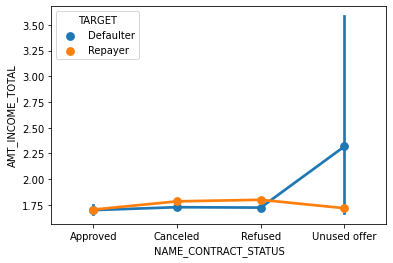

In [260]:
sns.pointplot(x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL', hue='TARGET', data=loan_process_df)

In [261]:
# The point plot show that the people who have not used offer earlier have defaulted even when there average income is higher than others

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='DEF_60_CNT_SOCIAL_CIRCLE'>

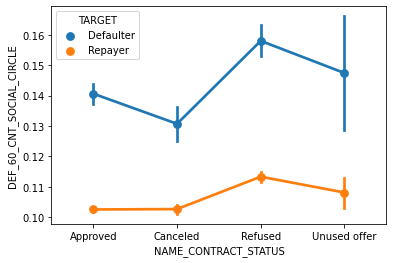

In [262]:
sns.pointplot(x='NAME_CONTRACT_STATUS', y='DEF_60_CNT_SOCIAL_CIRCLE', hue='TARGET', data=loan_process_df)

In [ ]:
# Clients who have average of 0.13 or higher DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and hence client's 
# social circle has to be analysed before providing the loan.

# INSIGHTS

In [ ]:
# Insights
# Decisive Factor whether an applicant will be Repayer:

# NAME_EDUCATION_TYPE: Academic degree has less defaults.

# NAME_INCOME_TYPE: Student and Businessmen have no defaults.

# REGION_RATING_CLIENT: RATING 1 is safer.

# ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry type 8 have defaulted less than 3%

# DAYS_BIRTH: People above age of 50 have low probability of defaulting

# DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate

# AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default

# NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly.

# CNT_CHILDREN: People with zero to two children tend to repay the loans.

# Decisive Factor whether an applicant will be Defaulter:

# CODE_GENDER: Men are at relatively higher default rate

# NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot.

# NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education

# NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.

# REGION_RATING_CLIENT: People who live in Rating 3 has highest defaults.

# OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as the default rate is huge.

# ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.

# DAYS_BIRTH: Avoid young people who are in age group of 20-40 as they have higher probability of defaulting

# DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.

# CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have children equal to or more than 9 default 100% and hence their applications are to be rejected.

# AMT_GOODS_PRICE: When the credit amount goes beyond 3M, there is an increase in defaulters.

# The following attributes indicate that people from these category tend to default but then due to the number of people and the amount of loan, the bank could provide loan with higher interest to mitigate any default risk thus preventing business loss:

# NAME_HOUSING_TYPE: High number of loan applications are from the category of people who live in Rented apartments & living with parents and hence offering the loan would mitigate the loss if any of those default.

# AMT_CREDIT: People who get loan for 300-600k tend to default more than others and hence having higher interest specifically for this credit range would be ideal.

# AMT_INCOME: Since 90% of the applications have Income total less than 300,000 and they have high probability of defaulting, they could be offered loan with higher interest compared to other income category.

# CNT_CHILDREN & CNT_FAM_MEMBERS: Clients who have 4 to 8 children has a very high default rate and hence higher interest should be imposed on their loans.

# NAME_CASH_LOAN_PURPOSE: Loan taken for the purpose of Repairs seems to have highest default rate. A very high number applications have been rejected by bank or refused by client in previous applications as well which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected, or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan. The same approach could be followed in future as well.

# 90% of the previously cancelled client have actually repayed the loan. Record the reason for cancellation which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity.

# 88% of the clients who were refused by bank for loan earlier have now turned into a repaying client. Hence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.